In [795]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
from sklearn.impute import KNNImputer
from datetime import date
from sklearn.impute import SimpleImputer




In [796]:
linkedin_data_original= pd.read_csv('/Users/deepak/Downloads/dump.csv')        


In [797]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [798]:
linkedin_data_original

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaN,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaN,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Cr

In [799]:
linkedin_data_original.columns

Index(['Unnamed: 0', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'companyName', 'companyStaffCount', 'companyUrl', 'companyUrn',
       'connectionsCount', 'country', 'endDate', 'followable',
       'followersCount', 'genderEstimate', 'hasPicture', 'isPremium',
       'mbrLocation', 'mbrLocationCode', 'mbrTitle', 'memberUrn',
       'posLocation', 'posLocationCode', 'posTitle', 'positionId', 'startDate',
       'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

In [800]:
linkedin_data_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ageEstimate            39537 non-null  float64
 2   companyFollowerCount   38071 non-null  float64
 3   companyHasLogo         36407 non-null  object 
 4   companyName            39535 non-null  object 
 5   companyStaffCount      38401 non-null  float64
 6   companyUrl             37449 non-null  object 
 7   companyUrn             39537 non-null  object 
 8   connectionsCount       39537 non-null  float64
 9   country                39537 non-null  object 
 10  endDate                30626 non-null  object 
 11  followable             39537 non-null  float64
 12  followersCount         39537 non-null  float64
 13  genderEstimate         35567 non-null  object 
 14  hasPicture             29601 non-null  object 
 15  is

Observations:

There are missing values in the companyFollowerCount etc
will impute missing columns 
mix of categorical and numnerical and string types 

In [801]:
linkedin_data_original.duplicated().sum()


0

In [802]:

# Let's check for missing values in the data
round(linkedin_data_original.isnull().sum() / linkedin_data_original.isnull().count() * 100, 2)


Unnamed: 0                0.00
ageEstimate               0.00
companyFollowerCount      3.71
companyHasLogo            7.92
companyName               0.01
companyStaffCount         2.87
companyUrl                5.28
companyUrn                0.00
connectionsCount          0.00
country                   0.00
endDate                  22.54
followable                0.00
followersCount            0.00
genderEstimate           10.04
hasPicture               25.13
isPremium                 0.00
mbrLocation               0.00
mbrLocationCode           0.37
mbrTitle                  0.00
memberUrn                 0.00
posLocation              28.14
posLocationCode          57.09
posTitle                  0.00
positionId                0.00
startDate                 0.04
avgMemberPosDuration      0.57
avgCompanyPosDuration     2.15
dtype: float64

In [803]:
#linkedin_data_original['endDate']=linkedin_data_original['endDate'].fillna(date.today())

##### OBSERVATIONS
#### posLocation,posLocationCode we can drop
#### impute,companyStaffCount, companyFollowerCount 
#### companyHasLogo do not drop , replace NA
## imputing company follower,staffcount,avgmember pos based on grouping

In [804]:

linkedin_data_original = linkedin_data_original.drop(['Unnamed: 0', 'posLocationCode', 'companyUrl', 
              'companyUrn','companyHasLogo','mbrLocationCode','posLocation'], axis=1)

In [805]:
linkedin_data_original[linkedin_data_original.companyName=='The Star Gold Coast'].companyFollowerCount

16          NaN
18          NaN
15647    3106.0
15649    3106.0
15650    3106.0
Name: companyFollowerCount, dtype: float64

In [806]:
linkedin_data_companystaff=linkedin_data_original.groupby('companyName').companyStaffCount.min()

In [807]:
linkedin_data_companyfollower=linkedin_data_original.groupby('companyName').agg(({'companyStaffCount':'min','companyFollowerCount':'min','avgCompanyPosDuration':'min'}))





In [808]:
linkedin_data_companyfollower

,companyStaffCount,companyFollowerCount,avgCompanyPosDuration
companyName,,,
Eco Energy Group Ltd,1.0,3.0,730.0000
Electricity Regulatory Authority of Vietnam (ERAV),4.0,15.0,1146.0000
(CFSGAM) Colonial First State Global Asset Management,363.0,7533.0,1081.1046
(Infocube) Jeeves Professional Services AB,33.0,459.0,1187.0000
(STC) Standard Telephones and Cables,10.0,64.0,1197.5500
...,...,...,...
zspace,13.0,448.0,588.3947
{Studio39},7.0,15.0,747.5000
Ãcole Polytechnique de MontrÃ©al,1430.0,51674.0,491.1455


In [809]:
linkedin_data_member=linkedin_data_original.groupby('memberUrn').agg(({'avgMemberPosDuration':'min'}))


In [810]:
cleantranscations = pd.merge(linkedin_data_companyfollower, linkedin_data_original, on='companyName')


In [811]:
cleantranscations = pd.merge(cleantranscations, linkedin_data_member, on='memberUrn')


In [812]:
cleantranscations

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,companyFollowerCount_y,companyStaffCount_y,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x,avgCompanyPosDuration_y,avgMemberPosDuration_y
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,3.0,1.0,500.0,au,NaN,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80,730.0000,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,272335.0,16686.0,500.0,au,2007-01-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80,1113.1341,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,27699.0,1557.0,500.0,au,1998-12-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80,1114.3256,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2016-08-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80,1188.7339,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2013-12-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80,1188.7339,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,3366.0,613.0,500.0,au,NaN,1.0,1445.0,male,b4ccdf67-9b5e-4efd-9961-d223502a6f20-3.jpg,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,NaN,1090.7874,NaN
39531,iFinance Australia,1.0,9.0,NaN,43.0,9.0,1.0,500.0,au,NaN,1.0,12907.0,male,455e3d81-1be3-4c29-9869-509106764ccd-3.jpg,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00,NaN,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,3307.0,321.0,36.0,au,NaN,1.0,36.0,male,NaN,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75,848.4765,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,3307.0,321.0,155.0,au,NaN,1.0,156.0,NaN,utmAgggztMkoTA7oV8QltfdkWOWkO9YeYKfJTL8UdgE.jpg,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00,848.4765,851.00


## data clean 
### rremove duplicate columns and retain non null values
### impute gender values , avg for follower count 
### run regression to for has picture 
## some hypothesis with inpremium data -- member location
## replaced missing avgcompany,followercount by grouping by company, member
## then took mean if still missing


In [813]:
# gwnder 
## encode category variable (target)
import category_encoders as ce
import pandas as pd
# data=pd.DataFrame({'City':[
# 'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
# ]})

#Create object for one-hot encoding
#encoder=ce.OneHotEncoder(cols='genderEstimate',handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoder= ce.OrdinalEncoder(cols=['genderEstimate'],return_df=True,
                           mapping=[{'col':'genderEstimate',
'mapping':{'male':0,'female':1}}])
##Fit and transform Data
cleantranscations = encoder.fit_transform(cleantranscations)
# data_encoded




In [814]:
cleantranscations

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,companyFollowerCount_y,companyStaffCount_y,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x,avgCompanyPosDuration_y,avgMemberPosDuration_y
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,3.0,1.0,500.0,au,NaN,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80,730.0000,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,272335.0,16686.0,500.0,au,2007-01-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80,1113.1341,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,27699.0,1557.0,500.0,au,1998-12-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80,1114.3256,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2016-08-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80,1188.7339,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2013-12-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80,1188.7339,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,3366.0,613.0,500.0,au,NaN,1.0,1445.0,0.0,b4ccdf67-9b5e-4efd-9961-d223502a6f20-3.jpg,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,NaN,1090.7874,NaN
39531,iFinance Australia,1.0,9.0,NaN,43.0,9.0,1.0,500.0,au,NaN,1.0,12907.0,0.0,455e3d81-1be3-4c29-9869-509106764ccd-3.jpg,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00,NaN,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,3307.0,321.0,36.0,au,NaN,1.0,36.0,0.0,NaN,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75,848.4765,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,3307.0,321.0,155.0,au,NaN,1.0,156.0,-1.0,utmAgggztMkoTA7oV8QltfdkWOWkO9YeYKfJTL8UdgE.jpg,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00,848.4765,851.00


In [815]:
round(cleantranscations.isnull().sum() / cleantranscations.isnull().count() * 100, 2)

companyName                 0.00
companyStaffCount_x         2.81
companyFollowerCount_x      3.65
avgCompanyPosDuration_x     2.15
ageEstimate                 0.00
companyFollowerCount_y      3.70
companyStaffCount_y         2.87
connectionsCount            0.00
country                     0.00
endDate                    22.54
followable                  0.00
followersCount              0.00
genderEstimate              0.00
hasPicture                 25.13
isPremium                   0.00
mbrLocation                 0.00
mbrTitle                    0.00
memberUrn                   0.00
posTitle                    0.00
positionId                  0.00
startDate                   0.04
avgMemberPosDuration_x      0.57
avgCompanyPosDuration_y     2.15
avgMemberPosDuration_y      0.57
dtype: float64

In [816]:

cleantranscations=cleantranscations.drop(['companyStaffCount_y','companyFollowerCount_y','avgCompanyPosDuration_y','avgMemberPosDuration_y'], axis=1)


In [817]:
round(cleantranscations.isnull().sum() / cleantranscations.isnull().count() * 100, 2)

companyName                 0.00
companyStaffCount_x         2.81
companyFollowerCount_x      3.65
avgCompanyPosDuration_x     2.15
ageEstimate                 0.00
connectionsCount            0.00
country                     0.00
endDate                    22.54
followable                  0.00
followersCount              0.00
genderEstimate              0.00
hasPicture                 25.13
isPremium                   0.00
mbrLocation                 0.00
mbrTitle                    0.00
memberUrn                   0.00
posTitle                    0.00
positionId                  0.00
startDate                   0.04
avgMemberPosDuration_x      0.57
dtype: float64

In [818]:
cleantranscations['companyStaffCount_x'].fillna(int(cleantranscations['companyStaffCount_x'].mean()), inplace=True)
cleantranscations['companyFollowerCount_x'].fillna(int(cleantranscations['companyFollowerCount_x'].mean()), inplace=True)
cleantranscations['avgCompanyPosDuration_x'].fillna(int(cleantranscations['avgCompanyPosDuration_x'].mean()), inplace=True)
cleantranscations['avgMemberPosDuration_x'].fillna(int(cleantranscations['avgMemberPosDuration_x'].mean()), inplace=True)



In [819]:
## impute gender estimate
cleantranscations.country.value_counts()


au    39535
Name: country, dtype: int64

In [820]:
## haspicture change 0 and 1 
cleantranscations['hasPicture'] = cleantranscations['hasPicture'].fillna(0)
cleantranscations.loc[cleantranscations["hasPicture"] !=0, "hasPicture"] = 1
   
# linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].hasPicture.replace()
#cleantranscations[(cleantranscations['hasPicture']!=0)]


In [821]:
cleantranscations.isPremium.value_counts()

0.0    34381
1.0     5154
Name: isPremium, dtype: int64

correlation


# regressions to impute the -1 gender to a real value (eother o ot 1 )

In [822]:
imputegendertransaction= cleantranscations.copy()
imputegendertransaction['genderEstimate']=imputegendertransaction.genderEstimate.replace(-1, np.nan)

X = imputegendertransaction.drop(["isPremium"], axis=1)
y = imputegendertransaction["isPremium"]



In [823]:
imputegendertransaction.genderEstimate.value_counts()

0.0    23832
1.0    11733
Name: genderEstimate, dtype: int64

In [824]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)


In [825]:
# Columns to impute
reqd_col_for_impute = ["genderEstimate"]

# Simple Imputer with Mode
imputer = SimpleImputer(strategy="most_frequent")

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])


In [826]:
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

companyName                   0
companyStaffCount_x           0
companyFollowerCount_x        0
avgCompanyPosDuration_x       0
ageEstimate                   0
connectionsCount              0
country                       0
endDate                    6263
followable                    0
followersCount                0
genderEstimate                0
hasPicture                    0
mbrLocation                   0
mbrTitle                      0
memberUrn                     0
posTitle                      0
positionId                    0
startDate                     9
avgMemberPosDuration_x        0
dtype: int64
------------------------------
companyName                   0
companyStaffCount_x           0
companyFollowerCount_x        0
avgCompanyPosDuration_x       0
ageEstimate                   0
connectionsCount              0
country                       0
endDate                    2647
followable                    0
followersCount                0
genderEstimate              

In [827]:
X_train.genderEstimate.value_counts()


0.0    19484
1.0     8190
Name: genderEstimate, dtype: int64

In [828]:
imputegendertransaction.genderEstimate.value_counts()

0.0    23832
1.0    11733
Name: genderEstimate, dtype: int64

In [829]:

print(X_train.shape, X_test.shape)

(27674, 19) (11861, 19)


In [830]:
imputegendertransaction.isPremium.value_counts()

0.0    34381
1.0     5154
Name: isPremium, dtype: int64

### predicting gender KNN using knn imputer
## how to select value of k 
## after imputing, features good for in premium
## random forecast, x-g boost
## hypothesis, 

In [831]:
from sklearn.impute import KNNImputer
import numpy as np

In [832]:
imputegendertransaction.head()

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,500.0,au,NaN,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.8
1,Avaya,16686.0,272335.0,1113.1341,44.0,500.0,au,2007-01-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.8
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,500.0,au,1998-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.8
3,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2016-08-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.8
4,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2013-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.8


In [833]:

imputer = KNNImputer(n_neighbors= 2)
imputegendertransactionestimate = np.round(imputer.fit_transform(imputegendertransaction[['genderEstimate']]))


In [834]:
temp=pd.DataFrame(imputegendertransactionestimate)

In [876]:
temp.value_counts()

0.0    27802
1.0    11733
dtype: int64

### imputation done

In [835]:
##random forest feature selection for inpremium

round(cleantranscations.isnull().sum() / cleantranscations.isnull().count() * 100, 2)


companyName                 0.00
companyStaffCount_x         0.00
companyFollowerCount_x      0.00
avgCompanyPosDuration_x     0.00
ageEstimate                 0.00
connectionsCount            0.00
country                     0.00
endDate                    22.54
followable                  0.00
followersCount              0.00
genderEstimate              0.00
hasPicture                  0.00
isPremium                   0.00
mbrLocation                 0.00
mbrTitle                    0.00
memberUrn                   0.00
posTitle                    0.00
positionId                  0.00
startDate                   0.04
avgMemberPosDuration_x      0.00
dtype: float64

In [839]:
cleantranscations.endDate.values

array([1, 0, 0, ..., 1, 1, 1], dtype=object)

In [838]:
cleantranscations['endDate'] = cleantranscations['endDate'].fillna(1)
cleantranscations.loc[cleantranscations["endDate"] !=1, "endDate"] = 0

In [840]:
cleantranscations.columns

Index(['companyName', 'companyStaffCount_x', 'companyFollowerCount_x',
       'avgCompanyPosDuration_x', 'ageEstimate', 'connectionsCount', 'country',
       'endDate', 'followable', 'followersCount', 'genderEstimate',
       'hasPicture', 'isPremium', 'mbrLocation', 'mbrTitle', 'memberUrn',
       'posTitle', 'positionId', 'startDate', 'avgMemberPosDuration_x'],
      dtype='object')

## clean group by data

In [842]:
#linkedin_data_copy.companyName.value_counts()
cleantranscations_copy=cleantranscations.copy()
linkedin_user=cleantranscations_copy.groupby('memberUrn').agg({'companyName':['nunique'],'posTitle':['count']}).reset_index()

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})
linkedin_user.columns

memberlevel = pd.merge(linkedin_user, cleantranscations_copy, on='memberUrn')
memberlevel=memberlevel.drop(['companyName','country','mbrLocation','mbrTitle',
                      'posTitle','positionId'], axis=1)

memberlevelgrp=memberlevel.groupby('memberUrn').agg({
    'ageEstimate': 'mean', 
    'companyFollowerCount_x': 'first',
    'connectionsCount':'mean',
    'endDate': 'first', 
    'followersCount': 'mean',
    'hasPicture':'first',
    'avgMemberPosDuration_x':'mean',
    'avgCompanyPosDuration_x':'first',
    'isPremium':'first',
    'startDate':'first',
    'companyStaffCount_x':'first',
    'followable':'first'
    
}).reset_index()


/var/folders/36/qftc13yd5z75xgyssqd0ngdw0000gn/T/ipykernel_19904/2655549542.py:8: FutureWarning:

merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)



In [843]:
memberlevelgrp.head()

,memberUrn,ageEstimate,companyFollowerCount_x,connectionsCount,endDate,followersCount,hasPicture,avgMemberPosDuration_x,avgCompanyPosDuration_x,isPremium,startDate,companyStaffCount_x,followable
0,urn:li:member:10013136,41.0,10047.0,500.0,0,506.0,0,760.5000,747.2308,0.0,2008-08-01,619.0,1.0
1,urn:li:member:100186032,30.0,4385293.0,500.0,0,951.0,1,395.2857,1188.7339,0.0,2014-11-01,568533.0,1.0
2,urn:li:member:100189195,33.0,3043.0,500.0,0,886.0,1,898.3333,1362.8257,1.0,2005-07-01,158.0,1.0
3,urn:li:member:100207000,40.0,117254.0,500.0,0,556.0,1,988.8333,750.7748,0.0,2010-09-01,6157.0,1.0
4,urn:li:member:100271877,42.0,58372.0,500.0,0,15286.0,1,673.3571,1280.0075,0.0,2013-01-01,9391.0,1.0


## outliers 

Column Name :  companyStaffCount_x
count      6853.000000
mean      20299.408142
std       66049.686019
min           0.000000
25%          79.000000
50%         934.000000
75%        7646.000000
max      568533.000000
Name: companyStaffCount_x, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



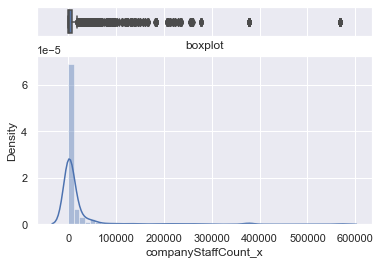

Column Name :  companyFollowerCount_x
count    6.853000e+03
mean     2.070847e+05
std      6.652952e+05
min      0.000000e+00
25%      1.148000e+03
50%      1.207200e+04
75%      1.172540e+05
max      7.502740e+06
Name: companyFollowerCount_x, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



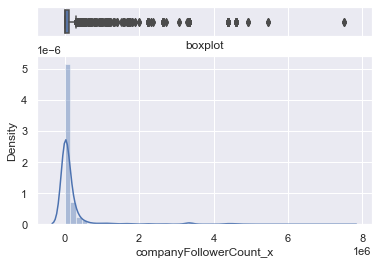

Column Name :  avgCompanyPosDuration_x
count    6853.000000
mean      898.213418
std       360.321357
min       -60.000000
25%       725.843000
50%       904.208200
75%      1045.913000
max      9497.000000
Name: avgCompanyPosDuration_x, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



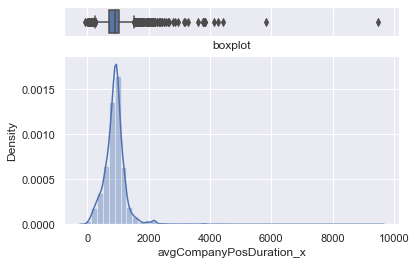

Column Name :  ageEstimate
count    6853.000000
mean       37.974464
std         9.811062
min        20.000000
25%        30.000000
50%        37.000000
75%        44.000000
max        86.000000
Name: ageEstimate, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



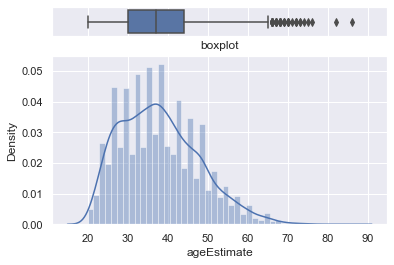

Column Name :  connectionsCount
count    6853.000000
mean      400.446520
std       139.833879
min         0.000000
25%       304.000000
50%       500.000000
75%       500.000000
max       500.000000
Name: connectionsCount, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



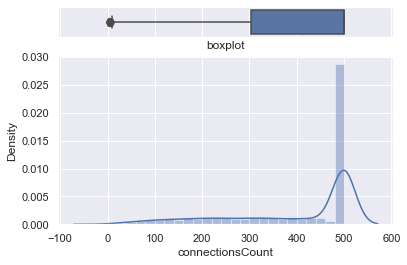

Column Name :  followersCount
count      6853.000000
mean       1019.553188
std        2678.074011
min           0.000000
25%         291.000000
50%         554.000000
75%        1013.000000
max      161922.000000
Name: followersCount, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



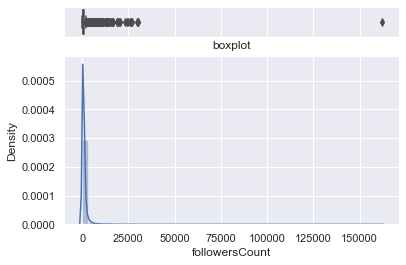

Column Name :  avgMemberPosDuration_x
count     6853.000000
mean      1005.614188
std        819.373703
min          0.000000
25%        547.666700
50%        822.500000
75%       1195.571400
max      15492.500000
Name: avgMemberPosDuration_x, dtype: float64


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



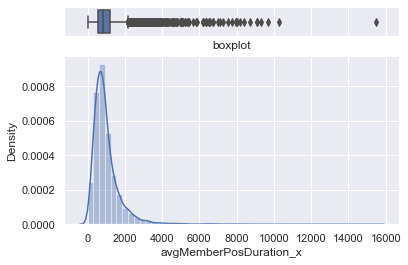

In [851]:
for column in memberlevelgrp[['companyStaffCount_x', 'companyFollowerCount_x','avgCompanyPosDuration_x',
                                'ageEstimate','connectionsCount','followersCount','avgMemberPosDuration_x']]:
    
    # Select column contents by column  
    # name using [] operator
    columnSeriesObj = memberlevelgrp[column]
    print('Column Name : ', column)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.set(style="darkgrid")

    # Add a graph in each part
    print(memberlevelgrp[column].describe())
    sns.boxplot(memberlevelgrp[column], ax=ax_box)
    sns.distplot(memberlevelgrp[column], ax=ax_hist)
    ax_box.set(xlabel='boxplot')
    plt.show()

In [858]:
memberlevelgrp.companyFollowerCount_x.describe()

count      6853.000000
mean      76325.501824
std      111851.635320
min           0.000000
25%        1148.000000
50%       12072.000000
75%      117254.000000
max      321451.000000
Name: companyFollowerCount_x, dtype: float64

# Computing 10th, 90th percentiles and replacing the outliers


In [853]:
ninetieth_percentile = np.percentile(memberlevelgrp.companyFollowerCount_x, 90)
# print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
b = np.where(memberlevelgrp.companyFollowerCount_x>ninetieth_percentile, ninetieth_percentile,memberlevelgrp.companyFollowerCount_x)
memberlevelgrp["companyFollowerCount_x"] = pd.Series(b) 
#b = np.where(a<4)
# print("Sample:", sample)
print("New array:",b)
print("New array:",ninetieth_percentile)


New array: [ 10047. 321451.   3043. ...  53175. 321451. 151686.]
New array: 321451.0


Column Name :  companyStaffCount_x
count      6853.000000
mean      20299.408142
std       66049.686019
min           0.000000
25%          79.000000
50%         934.000000
75%        7646.000000
max      568533.000000
Name: companyStaffCount_x, dtype: float64
New array: [  619. 42120.   158. ...  6677. 42120. 27944.]
New array: 42120.0
Column Name :  avgCompanyPosDuration_x
count    6853.000000
mean      898.213418
std       360.321357
min       -60.000000
25%       725.843000
50%       904.208200
75%      1045.913000
max      9497.000000
Name: avgCompanyPosDuration_x, dtype: float64
New array: [ 747.2308 1188.7339 1210.4338 ...  937.9322  598.4244  941.0968]
New array: 1210.4338
Column Name :  ageEstimate
count    6853.000000
mean       37.974464
std         9.811062
min        20.000000
25%        30.000000
50%        37.000000
75%        44.000000
max        86.000000
Name: ageEstimate, dtype: float64
New array: [41. 30. 33. ... 42. 29. 46.]
New array: 51.0
Column Name :  followers

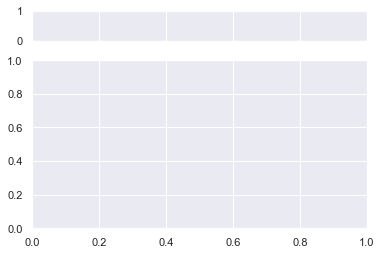

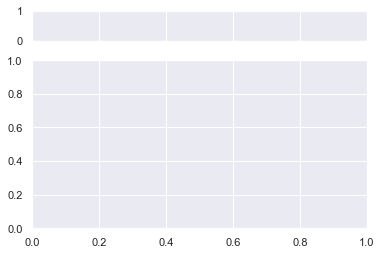

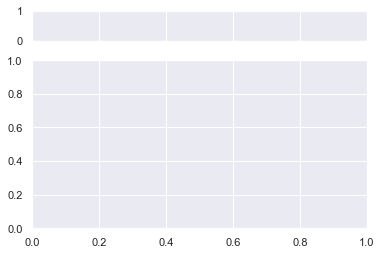

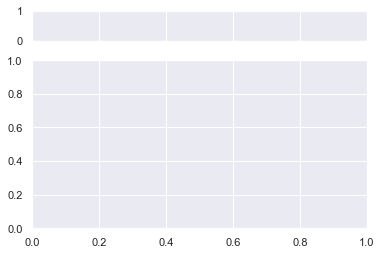

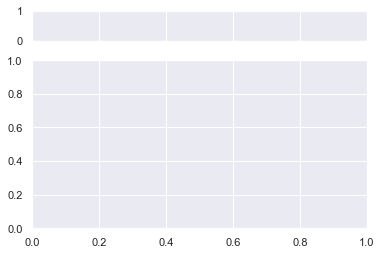

In [866]:
for column in memberlevelgrp[['companyStaffCount_x','avgCompanyPosDuration_x',
                                'ageEstimate','followersCount','avgMemberPosDuration_x']]:
    
    # Select column contents by column  
    # name using [] operator
    columnSeriesObj = memberlevelgrp[column]
    print('Column Name : ', column)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.set(style="darkgrid")

    # Add a graph in each part
    print(memberlevelgrp[column].describe())
    ninetieth_percentile = np.percentile(memberlevelgrp[column], 90)
    # print(tenth_percentile, ninetieth_percentile)b = np.where(sample<tenth_percentile, tenth_percentile, sample)
    b = np.where(memberlevelgrp[column]>ninetieth_percentile, ninetieth_percentile,memberlevelgrp[column])
    memberlevelgrp[column] = pd.Series(b) 
    #b = np.where(a<4)
    # print("Sample:", sample)
    print("New array:",b)
    print("New array:",ninetieth_percentile)

Column Name :  companyStaffCount_x


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



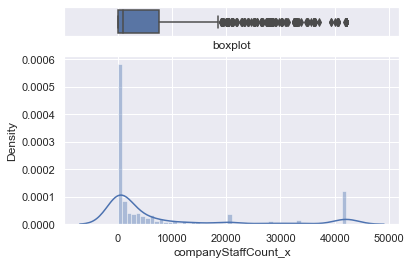

count     6853.000000
mean      8128.986283
std      13575.042987
min          0.000000
25%         79.000000
50%        934.000000
75%       7646.000000
max      42120.000000
Name: companyStaffCount_x, dtype: float64
Column Name :  avgCompanyPosDuration_x


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



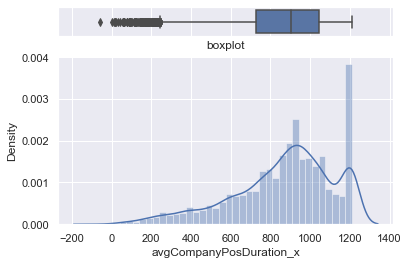

count    6853.000000
mean      864.541305
std       255.754008
min       -60.000000
25%       725.843000
50%       904.208200
75%      1045.913000
max      1210.433800
Name: avgCompanyPosDuration_x, dtype: float64
Column Name :  ageEstimate


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



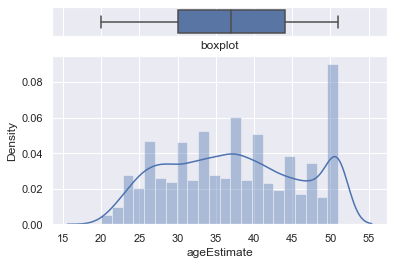

count    6853.000000
mean       37.368306
std         8.602532
min        20.000000
25%        30.000000
50%        37.000000
75%        44.000000
max        51.000000
Name: ageEstimate, dtype: float64
Column Name :  followersCount


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



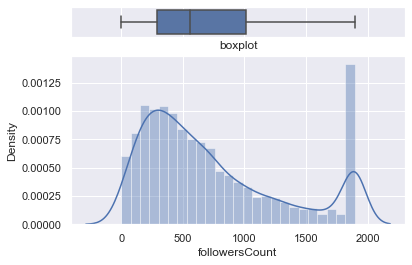

count    6853.000000
mean      724.243368
std       562.921950
min         0.000000
25%       291.000000
50%       554.000000
75%      1013.000000
max      1894.800000
Name: followersCount, dtype: float64
Column Name :  avgMemberPosDuration_x


/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



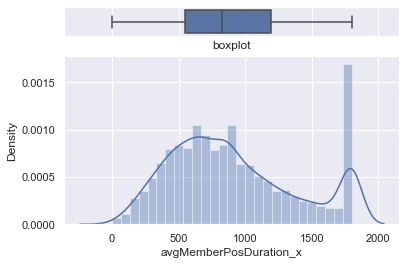

count    6853.000000
mean      906.852215
std       472.209299
min         0.000000
25%       547.666700
50%       822.500000
75%      1195.571400
max      1800.833300
Name: avgMemberPosDuration_x, dtype: float64


In [867]:
for column in memberlevelgrp[['companyStaffCount_x','avgCompanyPosDuration_x',
                                'ageEstimate','followersCount','avgMemberPosDuration_x']]:
    
    # Select column contents by column  
    # name using [] operator
    columnSeriesObj = memberlevelgrp[column]
    print('Column Name : ', column)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.set(style="darkgrid")
    sns.boxplot(memberlevelgrp[column], ax=ax_box)
    sns.distplot(memberlevelgrp[column], ax=ax_hist)
    ax_box.set(xlabel='boxplot')
    plt.show()
    # Add a graph in each part
    print(memberlevelgrp[column].describe())

##outlier detection done 
## ispremium random forest 

In [882]:
memberlevelgrp=memberlevelgrp.drop(["memberUrn","startDate"], axis=1)


In [918]:
memberlevelgrp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ageEstimate              6853 non-null   float64
 1   companyFollowerCount_x   6853 non-null   float64
 2   connectionsCount         6853 non-null   float64
 3   endDate                  6853 non-null   object 
 4   followersCount           6853 non-null   float64
 5   hasPicture               6853 non-null   object 
 6   avgMemberPosDuration_x   6853 non-null   float64
 7   avgCompanyPosDuration_x  6853 non-null   float64
 8   isPremium                6853 non-null   object 
 9   companyStaffCount_x      6853 non-null   float64
 10  followable               6853 non-null   float64
dtypes: float64(8), object(3)
memory usage: 589.1+ KB


In [884]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [920]:
X = memberlevelgrp.drop(["isPremium"], axis=1)

y = memberlevelgrp["isPremium"]
#memberlevelgrp.isPremium = memberlevelgrp.isPremium.astype('float64')

In [915]:
type(y)

pandas.core.series.Series

In [921]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [922]:
from sklearn.ensemble import RandomForestClassifier
 
forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)
#
# Train the mode
#
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [923]:
import numpy as np
 
importances = forest.feature_importances_
final_df=pd.DataFrame({"Features":pd.DataFrame(X_train).columns,"im":importances})
final_df.set_index('im')
final_df.sort_values('im')
#
# Sort the feature importance in descending order
#
# sorted_indices = np.argsort(importances)[::-1]
 
# feat_labels = ispremiumestimator.columns[1:]
 
# for f in range(X_train.shape[1]):
#     print("%2d) %-*s %f" % (f + 1, 30,
#                             feat_labels[sorted_indices[f]],
#                             importances[sorted_indices[f]]))

,Features,im
9,followable,0.005375
5,hasPicture,0.015085
3,endDate,0.022519
2,connectionsCount,0.048302
0,ageEstimate,0.115480
8,companyStaffCount_x,0.135915
1,companyFollowerCount_x,0.136387
7,avgCompanyPosDuration_x,0.150276
6,avgMemberPosDuration_x,0.163709
4,followersCount,0.206952


<AxesSubplot:>

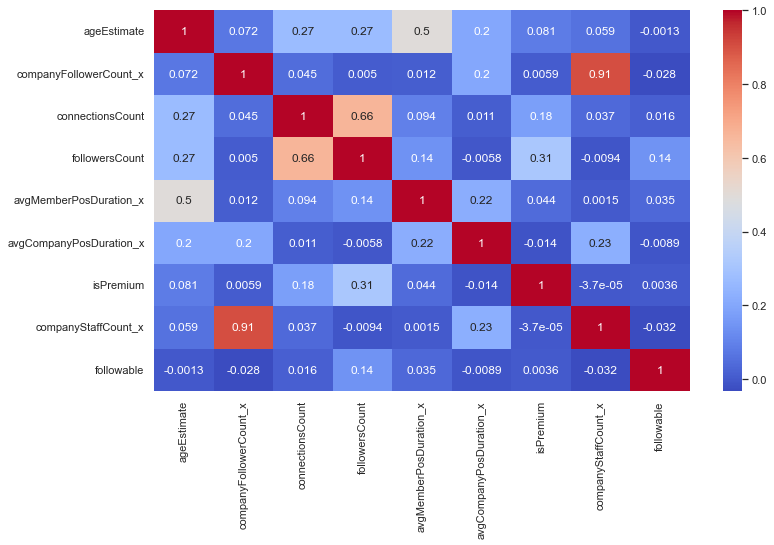

In [896]:
plt.figure(figsize = (12, 7))

sns.heatmap(memberlevelgrp.corr(), annot = True, cmap = "coolwarm")

In [452]:
## separate test and prediction  data 

traindate=cleantranscations[cleantranscations.genderEstimate!=-1]

testdate=cleantranscations[cleantranscations.genderEstimate==-1]

In [429]:
traindateage=traindate[['ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]


In [440]:
traindateage

,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,44.0,500.0,1.0,1847.0,845.8000,1
1,44.0,500.0,1.0,1847.0,845.8000,1
2,44.0,500.0,1.0,1847.0,845.8000,1
3,44.0,500.0,1.0,1847.0,845.8000,1
4,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...
39529,45.0,237.0,1.0,243.0,1612.3333,1
39530,31.0,500.0,1.0,1445.0,875.0000,1
39531,43.0,500.0,1.0,12907.0,4748.0000,1
39532,47.0,36.0,1.0,36.0,1095.7500,0


## logistic https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/

In [510]:

### traindata
traincorr=traindate[['genderEstimate','ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]
traincorr


,genderEstimate,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,0.0,44.0,500.0,1.0,1847.0,845.8000,1
1,0.0,44.0,500.0,1.0,1847.0,845.8000,1
2,0.0,44.0,500.0,1.0,1847.0,845.8000,1
3,0.0,44.0,500.0,1.0,1847.0,845.8000,1
4,0.0,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...,...
39529,1.0,45.0,237.0,1.0,243.0,1612.3333,1
39530,0.0,31.0,500.0,1.0,1445.0,875.0000,1
39531,0.0,43.0,500.0,1.0,12907.0,4748.0000,1
39532,0.0,47.0,36.0,1.0,36.0,1095.7500,0


<AxesSubplot:>

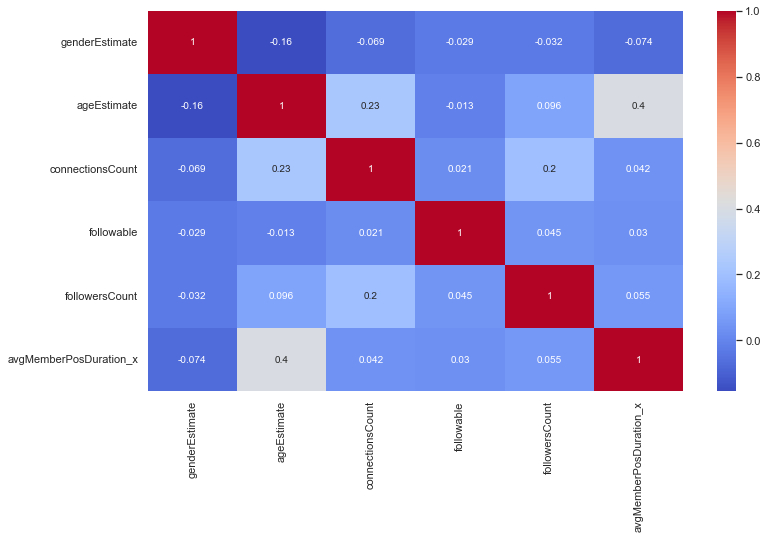

In [442]:
## corr

plt.figure(figsize = (12, 7))

sns.heatmap(traincorr.corr(), annot = True, cmap = "coolwarm")

####  ChiSq Test for gender estimate features

In [443]:
## gender estimate -- haspicture 
## has picture it is significant 
## how to put in predictor 
CrosstabResult=pd.crosstab(index=traincorr['genderEstimate'],columns=traincorr['hasPicture'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


hasPicture         0      1
genderEstimate             
0.0             5590  18242
1.0             3329   8404
The P-Value of the ChiSq Test is: 9.619982838625281e-24


In [445]:
# is premium is significant for gender 
CrosstabResult=pd.crosstab(index=traindate['genderEstimate'],columns=traindate['isPremium'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

isPremium         0.0   1.0
genderEstimate             
0.0             20429  3403
1.0             10416  1317
The P-Value of the ChiSq Test is: 1.6367598557430305e-15


In [459]:
CrosstabResult=pd.crosstab(index=traindate['genderEstimate'],columns=traindate['followable'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

followable       0.0    1.0
genderEstimate             
0.0             1060  22772
1.0              677  11056
The P-Value of the ChiSq Test is: 6.18071810901945e-08


In [461]:
### anova test

########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['ageEstimate'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.0439724367098338e-190


In [462]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['connectionsCount'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  8.088999776463919e-39


In [463]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['avgMemberPosDuration_x'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  8.202153496484059e-44


In [464]:
## model to predict gender
traindateage

,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,44.0,500.0,1.0,1847.0,845.8000,1
1,44.0,500.0,1.0,1847.0,845.8000,1
2,44.0,500.0,1.0,1847.0,845.8000,1
3,44.0,500.0,1.0,1847.0,845.8000,1
4,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...
39529,45.0,237.0,1.0,243.0,1612.3333,1
39530,31.0,500.0,1.0,1445.0,875.0000,1
39531,43.0,500.0,1.0,12907.0,4748.0000,1
39532,47.0,36.0,1.0,36.0,1095.7500,0


In [465]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(traindateage)
traindateage_scaled = scaler.transform(traindateage)

In [466]:
#type(traindateage_scaled)
y=traindate.genderEstimate

In [467]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(traindateage_scaled,y , test_size=0.2, random_state=42)

In [468]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [469]:
## accuracy of model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.91%


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [470]:
from sklearn.preprocessing import MinMaxScaler
testdateanswer=testdate[['ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]
scaler = MinMaxScaler()
scaler.fit(testdateanswer)
testdateanswer_scaled = scaler.transform(testdateanswer)
y_answer = clf.predict(testdateanswer_scaled)


In [476]:
y_answer

array([0., 0., 0., ..., 0., 0., 0.])

In [474]:
len(y_answer)

3970

### in premium features 

What's the % of Customers and customers that keep in with the premium  services.-- 
We can see different patterns in preimum Customers based on the type of features provided?
We have difference pattern of churn between genders ?
What's the difference between customers that pay monthly and by year?
what's the most profitable service types?
What's the amount lose in revenue?
What's the mean age of papeless customers? they are more propense to churn?
A lot of other questions that will raise trought the exploration




<AxesSubplot:>

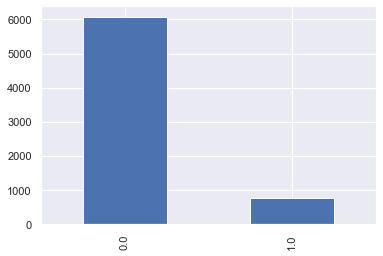

In [924]:
#What's the % of Customers and customers that keep in with the premium  services.-- 
memberlevelgrp.isPremium.value_counts().plot(kind='bar')

In [925]:
memberlevelgrp.isPremium.value_counts()/memberlevelgrp.isPremium.count()

0.0    0.886911
1.0    0.113089
Name: isPremium, dtype: float64

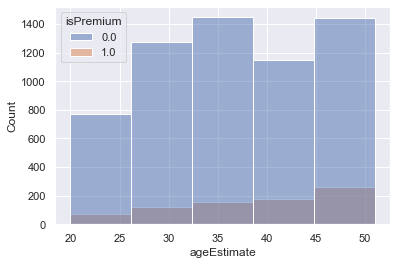

In [930]:
# ageEstimate
#cleantranscations.ageEstimate.plot.hist()
ax = sns.histplot(x = 'ageEstimate', hue = 'isPremium', data = memberlevelgrp,bins=5)


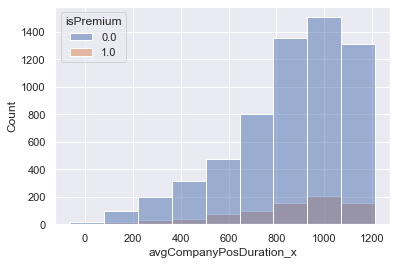

In [938]:
ax = sns.histplot(x = 'avgCompanyPosDuration_x', hue = 'isPremium', data = memberlevelgrp,bins=9)


In [ ]:
## avgCompanyPosDuration_x 
## low , medium ,highe duration- in premium-- non premium

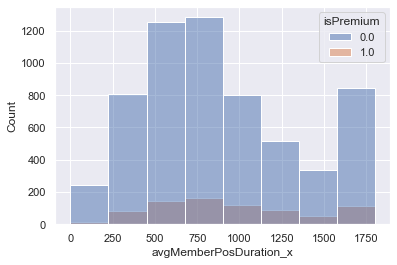

In [940]:
#memberlevelgrp[(memberlevelgrp['avgMemberPosDuration_x']<1500)].avgMemberPosDuration_x.plot.hist(bins=100)
ax = sns.histplot(x = 'avgMemberPosDuration_x', hue = 'isPremium', data = memberlevelgrp,bins=8)


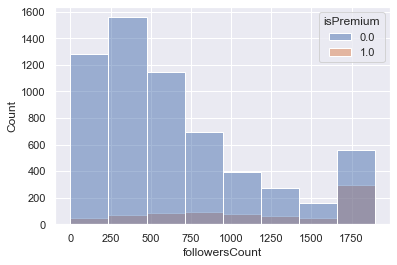

In [941]:
ax = sns.histplot(x = 'followersCount', hue = 'isPremium', data = memberlevelgrp,bins=8)


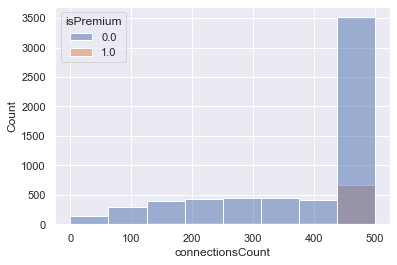

In [944]:
ax = sns.histplot(x = 'connectionsCount', hue = 'isPremium', data = memberlevelgrp,bins=8)


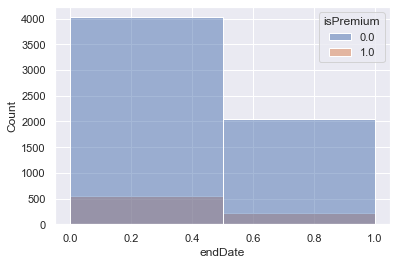

In [946]:
ax = sns.histplot(x = 'endDate', hue = 'isPremium', data = memberlevelgrp,bins=2)


## FEATURE ENGINEERING

Observations:
CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
Customer_Age: Average age of customers is 46 years and it has a wide range from 26 to 73 years.
Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.

In [ ]:
Observations:
CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
Customer_Age: Average age of customers is 46 years and it has a wide range from 26 to 73 years.
Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.

#### ANALYSING CATEGORICAL

In [517]:
cleantranscations.describe(include=["object"]).T

,count,unique,top,freq
companyName,39535,13755,Telstra,683
country,39535,1,au,39535
hasPicture,39535,2,1,29599
mbrLocation,39535,474,"Sydney, Australia",9021
mbrTitle,39535,6710,National Coordinator - Website and Learning Ma...,69
memberUrn,39535,6853,urn:li:member:51452257,69
posTitle,39535,23907,Project Manager,442


In [ ]:
for i in cleantranscations.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(cleantranscations[i].value_counts())
    print("*" * 50)

In [518]:
cleantranscations.head()

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,500.0,au,2022-09-21,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.8
1,Avaya,16686.0,272335.0,1113.1341,44.0,500.0,au,2007-01-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.8
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,500.0,au,1998-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.8
3,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2016-08-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.8
4,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2013-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.8


#### ANALYSING FRATURES BY GRAPHS
#### connections count,followers : avg count 
#### ciuntry 
##### has picture,is premium - bargrpah
##### mbrLocation- density graph
##### mbr title per person -graph
#### avgMemberPosDuration,avgCompanyPosDuration -graph

# selecting criteria for premium 
#companies, employeees, jobs title 
#active vs non active customers (last date check )
#reasons to get premium
#followers count- more engagement, network increase, visibility increase  
   #followers count (high) - premium - creater mode,monteize 
#companyHasLogo- authenicity,followers less - more likely to change
#company avg - less more- likely to change
#companyStaffCount- same increase visibility in same as company connection 
#hasPicture-engagement,location- high%  of people taken premium 
#end date-- open job or not
##how oftern company changes, with titles / time :check this
#company profile: company picture,followers,url size -- premium 
#number of companies, position- frequent changer
#title- duration  - exceed than avg - more likely to change
# hypothesis with premium 

### companies analysis

In [519]:
cleantranscations_copy=cleantranscations.copy()

In [927]:
# buckets , bar graph 
memberlevelgrp.avgMemberPosDuration_x.value_counts()


1800.8333    686
875.0000     161
1065.0000     18
1430.0000     15
639.0000      12
            ... 
745.0000       1
1034.6000      1
694.0000       1
243.3333       1
369.9000       1
Name: avgMemberPosDuration_x, Length: 4404, dtype: int64

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



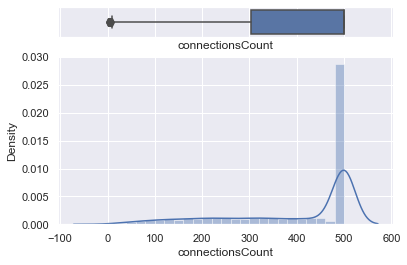

In [929]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(memberlevelgrp["connectionsCount"], ax=ax_box)
sns.distplot(memberlevelgrp["connectionsCount"], ax=ax_hist)
ax_box.set(xlabel='connectionsCount')
plt.show()



#### 500 connectoins is considered on higher side, MOST PEOPLE HAVE THAT

<AxesSubplot:ylabel='Frequency'>

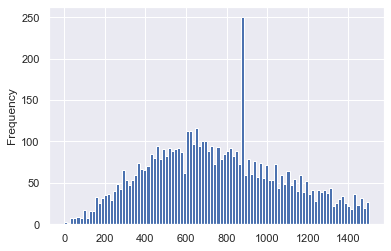

In [548]:
memberlevelgrp[(memberlevelgrp['avgMemberPosDuration_x']<1500)].avgMemberPosDuration_x.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

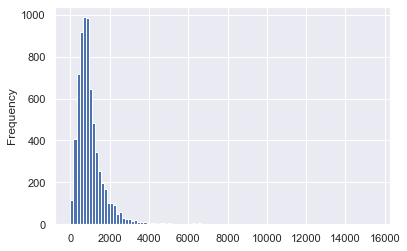

In [551]:
memberlevelgrp.avgMemberPosDuration_x.plot.hist(bins=100)
# peak around 1500-2000 days , then it is right skewed 

In [552]:
memberlevelgrp.avgMemberPosDuration_x.describe()

count     6853.000000
mean      1005.614188
std        819.373703
min          0.000000
25%        547.666700
50%        822.500000
75%       1195.571400
max      15492.500000
Name: avgMemberPosDuration_x, dtype: float64

##### OBSERVATIONS
#### avgMemberPosDuration : mean is around 870 and median 730- most of the candidates around 2 years
#### after 800~ 3.5 YEARS there is downard trend - more likely cadidates will take premium after 2 years
### it is cyclical trend every year


<AxesSubplot:ylabel='Frequency'>

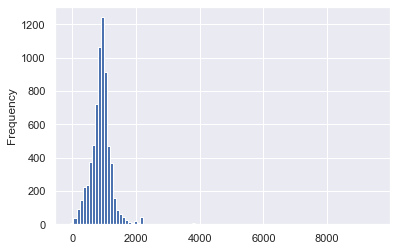

In [553]:
#some big companies will push data towards towards higher number how to balance it 
# dell vs startups 
memberlevelgrp.avgCompanyPosDuration_x.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

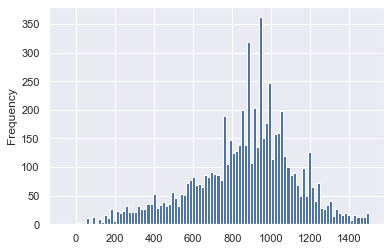

In [554]:
memberlevelgrp[(memberlevelgrp['avgCompanyPosDuration_x']<1500)].avgCompanyPosDuration_x.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

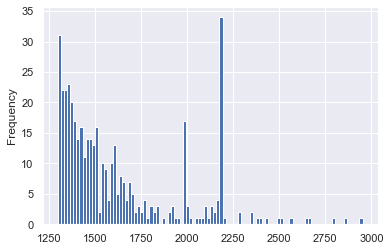

In [555]:
memberlevelgrp[(memberlevelgrp['avgCompanyPosDuration_x']>1300) & (memberlevelgrp['avgCompanyPosDuration_x']<3000)].avgCompanyPosDuration_x.plot.hist(bins=100)




In [556]:
memberlevelgrp.avgCompanyPosDuration_x.describe()

count    6853.000000
mean      898.213418
std       360.321357
min       -60.000000
25%       725.843000
50%       904.208200
75%      1045.913000
max      9497.000000
Name: avgCompanyPosDuration_x, dtype: float64

In [557]:
memberlevelgrp.avgCompanyPosDuration_x.value_counts()

887.0000     168
942.0500     116
989.9361      86
1050.0325     80
937.9322      52
            ... 
398.0000       1
1310.5168      1
241.1466       1
198.0000       1
584.3958       1
Name: avgCompanyPosDuration_x, Length: 3540, dtype: int64

#### avgCompanyPosDuration : mean is around 900 and median 900 - most of the companies employee stay is around 2.5 years
### after 2.5 years  there is downard trend - more likely cadidates will take premium after 2 years


In [559]:
memberlevelgrp

,memberUrn,ageEstimate,companyFollowerCount_x,connectionsCount,endDate,followersCount,hasPicture,genderEstimate,avgMemberPosDuration_x,avgCompanyPosDuration_x,isPremium
0,urn:li:member:10013136,41.0,10047.0,500.0,2012-12-01,506.0,0,0.0,760.5000,747.2308,0.0
1,urn:li:member:100186032,30.0,4385293.0,500.0,2015-12-01,951.0,1,1.0,395.2857,1188.7339,0.0
2,urn:li:member:100189195,33.0,3043.0,500.0,2005-09-01,886.0,1,0.0,898.3333,1362.8257,1.0
3,urn:li:member:100207000,40.0,117254.0,500.0,2013-08-01,556.0,1,-1.0,988.8333,750.7748,0.0
4,urn:li:member:100271877,42.0,58372.0,500.0,2014-12-01,15286.0,1,0.0,673.3571,1280.0075,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6848,urn:li:member:996695,41.0,6786.0,500.0,2016-06-01,3070.0,1,0.0,1083.6667,584.3958,0.0
6849,urn:li:member:99727786,45.0,21283.0,335.0,2022-09-21,336.0,1,0.0,910.1000,2187.4245,0.0
6850,urn:li:member:9976147,42.0,53175.0,500.0,2012-12-01,991.0,1,0.0,369.9000,937.9322,0.0
6851,urn:li:member:99806927,29.0,7502740.0,201.0,2022-09-21,202.0,1,0.0,488.0000,598.4244,0.0


In [ ]:

#linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].loc[hasPicture=1
                                                              

In [564]:
#linkedin_data_copy=linkedin_data_copy["hasPicture"].fillna(0, inplace=True)
memberlevelgrp['duration']=memberlevelgrp.endDate-memberlevelgrp.startDate
memberlevelgrp['duration']=memberlevelgrp['duration'].dt.days

<AxesSubplot:ylabel='Frequency'>

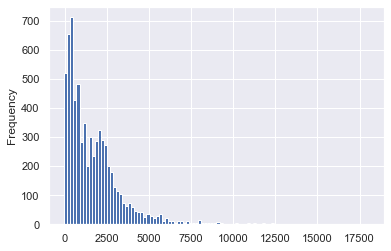

In [568]:
memberlevelgrp.duration.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

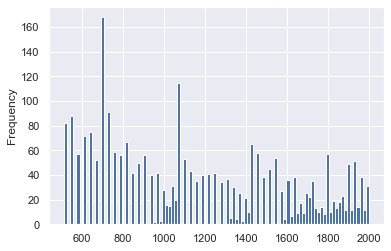

In [571]:
#linkedin_data_copy.value_counts('duration').plot.hist(bins=100)
memberlevelgrp[(memberlevelgrp['duration']>500) & (memberlevelgrp['duration']<2000)].duration.plot.hist(bins=100)



<AxesSubplot:ylabel='Frequency'>

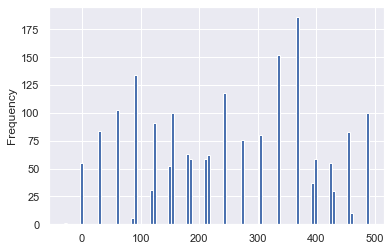

In [572]:
memberlevelgrp[(memberlevelgrp['duration']<500)].duration.plot.hist(bins=100)


#### most of the candidates leave around 2 years , then there is decline trend 
#### duration has some cyclicity to it , after a year or so 
#### candidates leave around their anniversary or so, 

#### try to make segments for marketing team ,with other features

### 75%-- has picture 25 %-- do not have picture

In [ ]:
#linkedin_data_copy["companyHasLogo"].fillna(0,inplace=True)

In [ ]:

#linkedin_data_copy.loc[(linkedin_data_copy.companyHasLogo!=0),'companyHasLogo']='1'

In [ ]:
#find latest start date and check end date for each person to check job open or not

In [ ]:
linkedin_user.rename

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



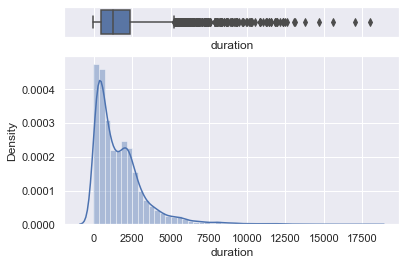

In [573]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(memberlevelgrp["duration"], ax=ax_box)
sns.distplot(memberlevelgrp["duration"], ax=ax_hist)
ax_box.set(xlabel='duration')
plt.show()

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



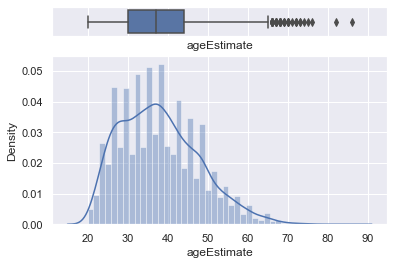

In [574]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(memberlevelgrp["ageEstimate"], ax=ax_box)
sns.distplot(memberlevelgrp["ageEstimate"], ax=ax_hist)
ax_box.set(xlabel='ageEstimate')
plt.show()

Text(0, 0.5, 'gender premium %')

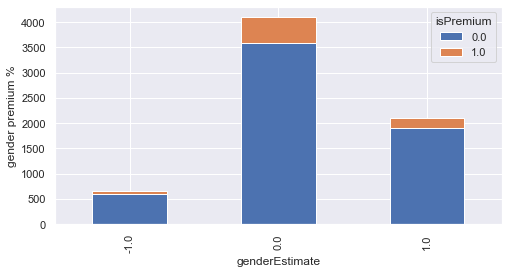

In [576]:
(pd.crosstab(memberlevelgrp['genderEstimate'],memberlevelgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('gender premium %')


Text(0, 0.5, ' premium %')

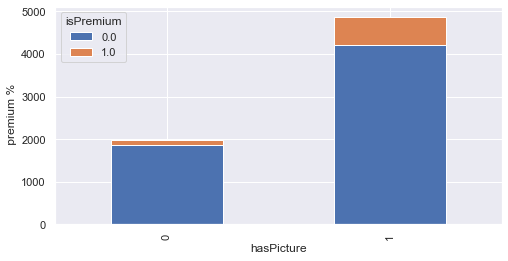

In [575]:
(pd.crosstab(memberlevelgrp['hasPicture'],memberlevelgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel(' premium %')


Text(0, 0.5, 'average company %')

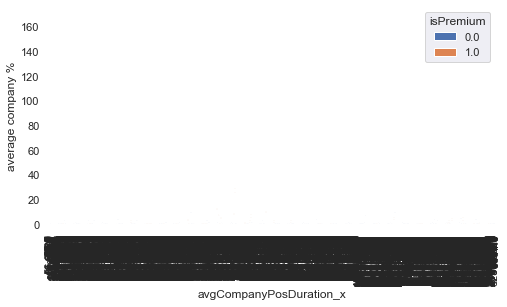

In [577]:
(pd.crosstab(memberlevelgrp['avgCompanyPosDuration_x'],memberlevelgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('average company %')
